# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
using PyPlot
using DualNumbers

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

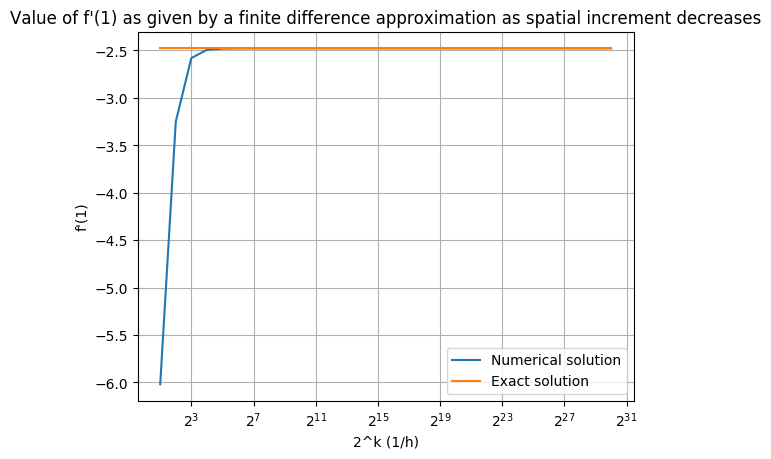

(30,)


PyObject <matplotlib.legend.Legend object at 0x7ff0dc5edb10>

In [11]:
using PyPlot
k = 1:30
h = 1./(2.^k)

function f(x)
    return sin(exp(x))
end

x = 1
diff = zeros(30)
println(size(diff))
for i in 1:30
    diff[i] = (-f(x+2*h[i])+4*f(x+h[i])-3*f(x))/(2*h[i])
end

plot(2.^k, diff,label="Numerical solution")#,xscale=:log2, ylims=(-6, -2))
exact = exp(1)*cos(exp(1))*ones(30)
plot(2.^k, exact, label="Exact solution")
xlabel("2^k (1/h)")
ylabel("f'(1)")
xscale("log",basex=2)
grid("on")
title("Value of f'(1) as given by a finite difference approximation as spatial increment decreases")
legend()


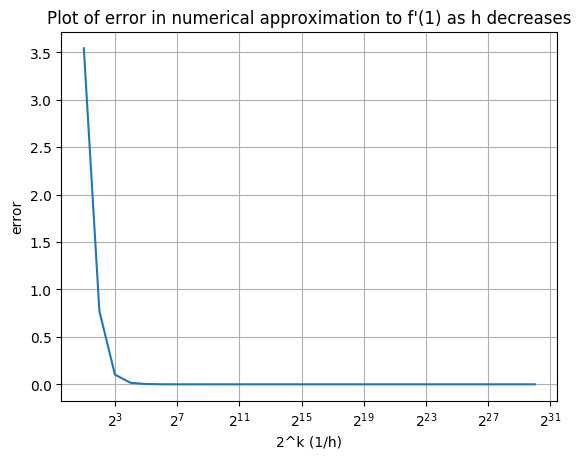

PyObject <matplotlib.text.Text object at 0x7ff0dc55e890>

In [12]:
plot(2.^k, exact - diff, label="Error")
xscale("log", basex=2)
grid("on")
xlabel("2^k (1/h)")
ylabel("error")
title("Plot of error in numerical approximation to f'(1) as h decreases")

In [14]:
using DualNumbers

x = Dual(1,1)

function f(x) 
    return sin(exp(x))
end

y = f(x)

println("f(1) = ", realpart(y))
println("f'(1) = ", dualpart(y))
println("f(1) = ", realpart(y))
println("Difference between this and exact value = ", abs(dualpart(y) - exp(1)*cos(exp(1))))
println(isequal(exp(1)*cos(exp(1)),dualpart(y)))


f(1) = 0.41078129050290885
f'(1) = -2.478349732955235
f(1) = 0.41078129050290885
Difference between this and exact value = 0.0
true



## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

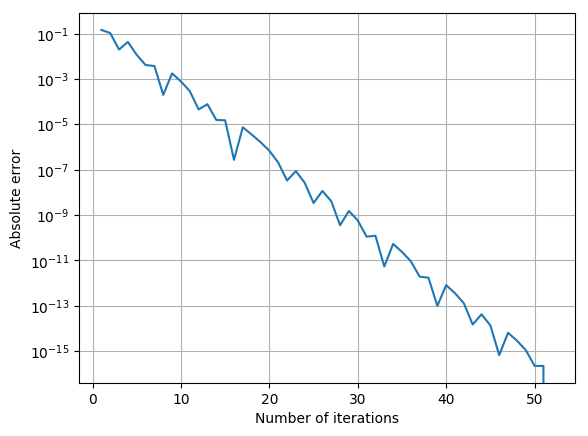

In [5]:
function f(x)
    return sin(exp(x))
end

a = 0.5;
b = 1.5;

error = []

while b-a > (abs(a)+abs(b))*eps()/2
    x = (a+b)/2
    if f(a)*f(x) > 0
        a = x
        b = b
    else
        a = a
        b = x
    end
    error = append!(error, [abs(log(pi)-x)])
end

i = 1:length(error)
plot(i, error[1:end])
grid("on")
xlabel("Number of iterations")
ylabel("Absolute error")
yscale("log")



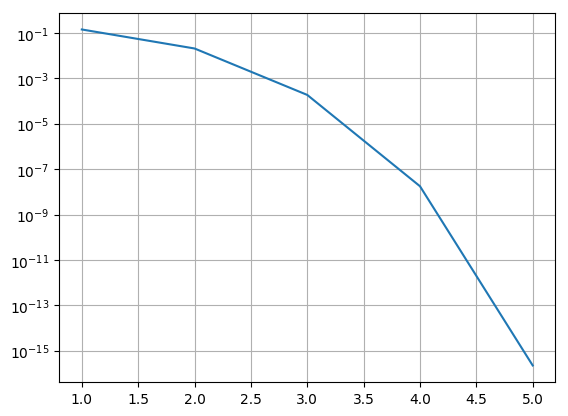

The solution is 1.1447298858494004


In [6]:
function funcdiff(x)
    return exp(x)*cos(exp(x))
end

function func(x)
    return sin(exp(x))
end

x0 = 1
x=x0
errormat = [abs(x-log(pi))]
while abs(func(x)) > 0.000000000000001
    delta = -func(x)/funcdiff(x)
    x = x+delta
    error = abs(x - log(pi))
    errormat = append!(errormat, error)
end

println("The solution is ", x)
j = 1:length(errormat)
plot(j, errormat)
grid("on")
yscale("log")


## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.

\begin{gather}
f(x) = \sin\left(e^x\right) \\
f'(x) = e^x\cos\left(e^x\right) \\
f'(x) = 0 \Rightarrow e^x = \frac{(2k-1)\pi}{2} \Rightarrow x = \log\left(\frac{(2k-1)\pi}{2}\right)
\end{gather}

The only values of $k$ that give us values of $x$ in the interval $(0, 2)$ are $k=1$ and $k=2$.

We now want to check which of these are minima.


In [7]:
log(5pi/2)

2.061020617723555